<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [5]:
# write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# write your code here

df = pd.read_csv("CO2_emission_data.csv")

df.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\spice\AppData\Local\Temp\ipykernel_14136\713544975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="Set2")


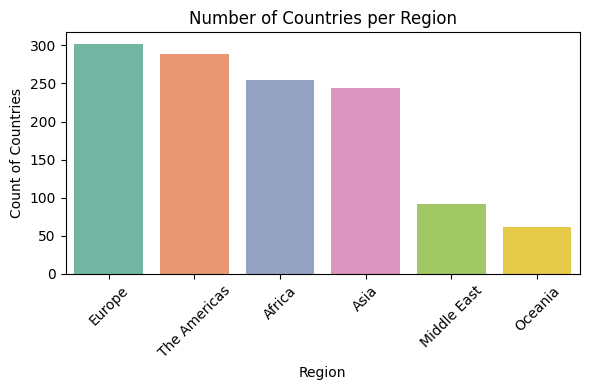

In [7]:
# write your code here
region_counts = df['Region'].value_counts()

# Visualize
plt.figure(figsize=(6, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="Set2")
plt.title('Number of Countries per Region')
plt.xlabel('Region')
plt.ylabel('Count of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# write your code here

print("Data Types:\n", df.dtypes)

# 2. Dimensions (rows, columns)
print("\nDimensions:", df.shape)

# 3. Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

Data Types:
 Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

Dimensions: (1243, 7)

Summary Statistics:
         Region  CO2 Emissions  Ease of Business  Energy Usage           GDP  \
count     1243   1.243000e+03       1243.000000  1.243000e+03  1.243000e+03   
unique       6            NaN               NaN           NaN           NaN   
top     Europe            NaN               NaN           NaN           NaN   
freq       302            NaN               NaN           NaN           NaN   
mean       NaN   1.897666e+05         88.279968  7.541842e+04  3.535548e+11   
std        NaN   7.697027e+05         52.770388  2.707586e+05  1.358970e+12   
min        NaN   4.800000e+01          1.000000  3.000000e+01  1.232585e+08   
25%        NaN   3.111500e+03         45.000000  2.721000e+03  7.746581e+09   
50%        NaN   1.62

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# write your code here

df_drop = df.drop(['Region' , 'Ease of Business', 'Internet Usage'], axis=1)

df_drop

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5.652325e+09,3033659
1,4166,2172,7.464447e+09,3014579
2,4254,2172,8.376484e+09,2992724
3,3865,2068,9.132562e+09,2968028
4,4056,2025,1.070101e+10,2940880
...,...,...,...,...
1238,2274,7213,7.178556e+09,11470022
1239,2226,7396,1.070220e+10,11781612
1240,1654,7399,1.154142e+10,12109620
1241,1845,7641,1.464079e+10,12456527


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# write your code here

missing_val = df_drop.isnull().sum()

missing_val

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

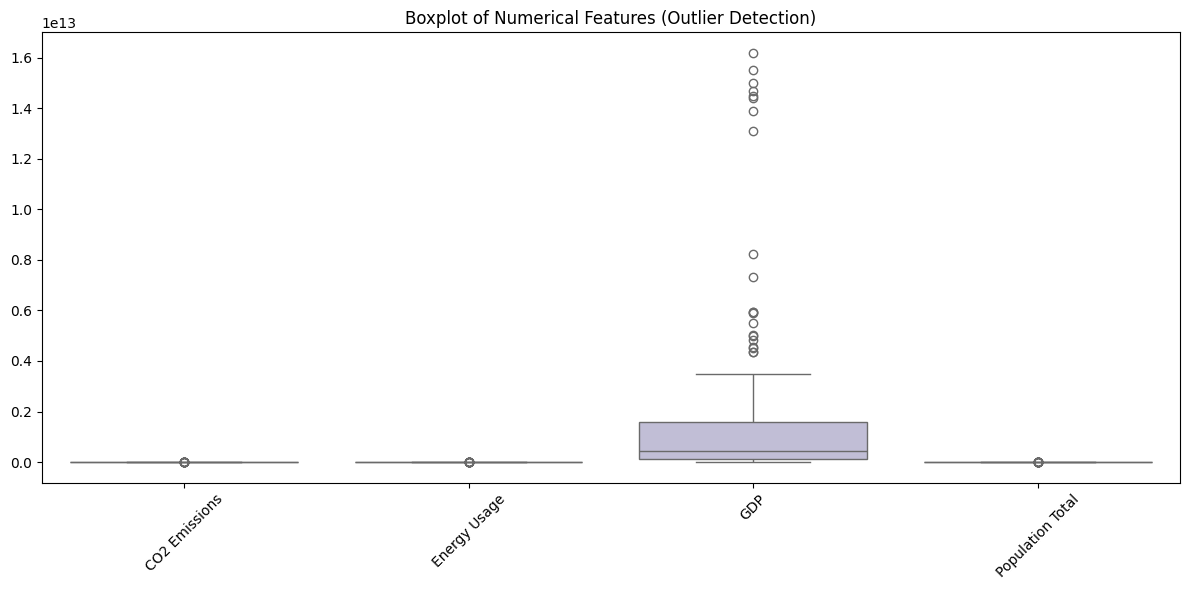

In [40]:
# write your code here

value_columns = ['CO2 Emissions', 'Energy Usage', 'GDP', 'Population Total']

for col in value_columns:
    Q1 = df_drop[col].quantile(0.25)
    Q3 = df_drop[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_drop[(df_drop[col] < lower_bound) | (df_drop[col] > upper_bound)]
    

plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers[value_columns], palette="Set3")
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. `Remove the outliers using 3.5IQR and check the shape of the data`.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# write your code here

for col in value_columns:
    Q1 = df_drop[col].quantile(0.25)
    Q3 = df_drop[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 3.5 * IQR
    lower_bound = Q1 - 3.5 * IQR
    
    outliers_IQR = df_drop[(df_drop[col] < lower_bound) | (df_drop[col] > upper_bound)]
    

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

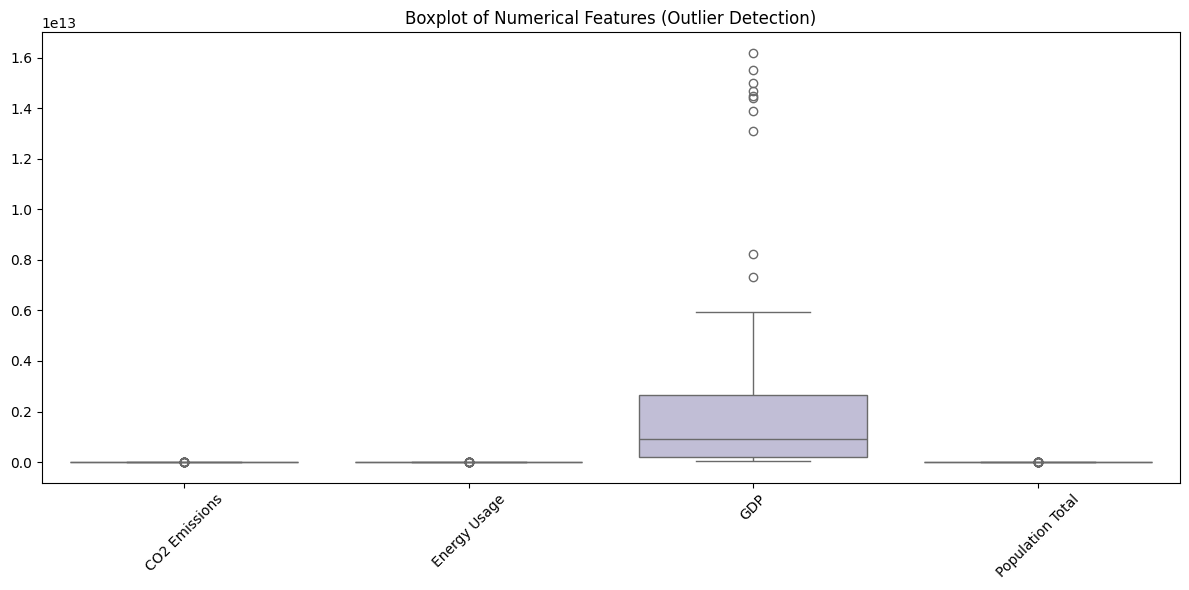

In [41]:
# write your code here

plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers_IQR[value_columns], palette="Set3")
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# write your code here

from sklearn.preprocessing import StandardScaler
value_columns

scaler = StandardScaler()
df[value_columns] = scaler.fit_transform(df[value_columns])

print(df[value_columns].describe())


       CO2 Emissions  Energy Usage           GDP  Population Total
count   1.243000e+03  1.243000e+03  1.243000e+03      1.243000e+03
mean    1.143271e-17 -1.429088e-17  5.716353e-18     -2.858177e-18
std     1.000402e+00  1.000402e+00  1.000402e+00      1.000402e+00
min    -2.465822e-01 -2.785461e-01 -2.601778e-01     -2.816863e-01
25%    -2.426005e-01 -2.686034e-01 -2.545659e-01     -2.690136e-01
50%    -2.255786e-01 -2.442287e-01 -2.421002e-01     -2.337425e-01
75%    -1.481098e-01 -1.494992e-01 -1.299704e-01     -1.018121e-01
max     1.052404e+01  9.799787e+00  1.166532e+01      8.160571e+00


<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# write your code here
from scipy.cluster.hierarchy import linkage

linkage_matrix = linkage(df[value_columns], method='ward')

print(linkage_matrix[:10])

[[4.35000000e+02 4.37000000e+02 2.02745110e-06 2.00000000e+00]
 [4.46000000e+02 4.47000000e+02 3.48192950e-06 2.00000000e+00]
 [4.36000000e+02 4.38000000e+02 7.66877345e-06 2.00000000e+00]
 [3.60000000e+01 3.70000000e+01 8.50419553e-06 2.00000000e+00]
 [5.58000000e+02 5.59000000e+02 9.40855466e-06 2.00000000e+00]
 [4.39000000e+02 4.40000000e+02 9.95235202e-06 2.00000000e+00]
 [2.60000000e+01 2.70000000e+01 1.07790527e-05 2.00000000e+00]
 [4.44000000e+02 4.45000000e+02 1.17894641e-05 2.00000000e+00]
 [1.13200000e+03 1.13300000e+03 1.25766302e-05 2.00000000e+00]
 [9.68000000e+02 9.70000000e+02 1.61735614e-05 2.00000000e+00]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

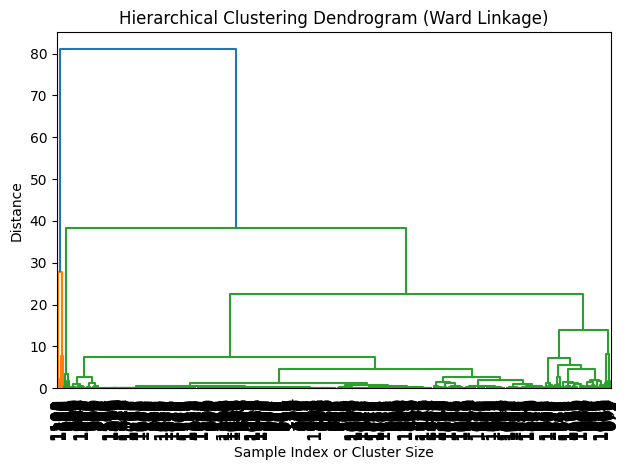

In [51]:
# write your code here

from scipy.cluster.hierarchy import dendrogram

plt.Figure(figsize=(12,6))
dendrogram(linkage_matrix,
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# write your code here

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Compute cophenetic correlation coefficient
coph_corr, coph_dists = cophenet(linkage_matrix, pdist(df[value_columns]))

print(f"Cophenetic Correlation Coefficient: {coph_corr:.4f}")

Cophenetic Correlation Coefficient: 0.9112


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# write your code here

from sklearn.cluster import AgglomerativeClustering

# Define the optimal number of clusters (you can replace 'n_clusters=3' based on dendrogram)
optimal_clusters = 3

# Instantiate the clustering model
model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')

# Fit the model to the scaled data
cluster_labels = model.fit_predict(df[value_columns])

cluster_labels



array([1, 1, 1, ..., 1, 1, 1], shape=(1243,))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# write your code here
# Add the cluster labels to the original DataFrame
df_drop['Cluster'] = cluster_labels

# Preview the first few rows
print(df_drop.head())

   CO2 Emissions  Energy Usage           GDP  Population Total  Cluster
0           4294          1976  5.652325e+09           3033659        1
1           4166          2172  7.464447e+09           3014579        1
2           4254          2172  8.376484e+09           2992724        1
3           3865          2068  9.132562e+09           2968028        1
4           4056          2025  1.070101e+10           2940880        1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Cluster Sizes:
 Cluster
0      16
1    1214
2      13
Name: count, dtype: int64


C:\Users\spice\AppData\Local\Temp\ipykernel_14136\1859182629.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_drop, palette='Set2')


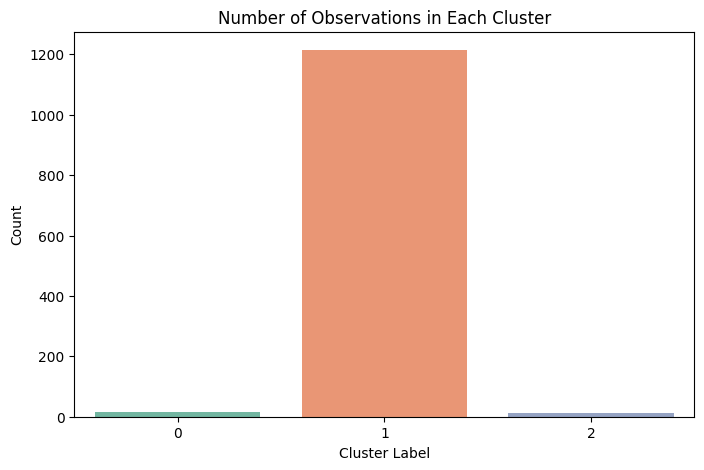

In [59]:
# write your code here

cluster_counts = df_drop['Cluster'].value_counts().sort_index()
print("Cluster Sizes:\n", cluster_counts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_drop, palette='Set2')

plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

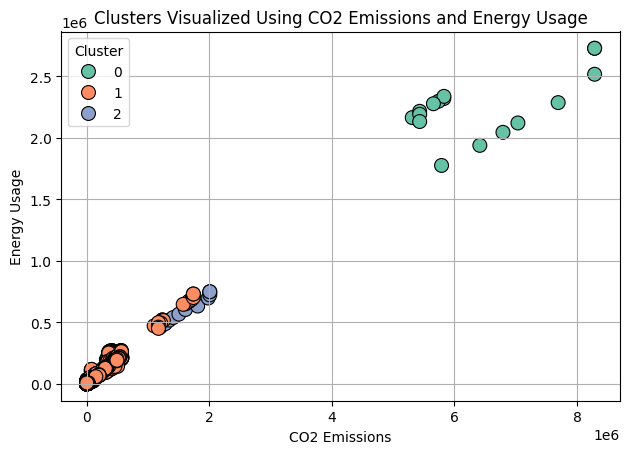

In [60]:
# write your code here

sns.scatterplot(
    data=df_drop,
    x='CO2 Emissions',
    y='Energy Usage',
    hue='Cluster',
    palette='Set2',
    s=100,
    edgecolor='black'
)

plt.title('Clusters Visualized Using CO2 Emissions and Energy Usage')
plt.xlabel('CO2 Emissions')
plt.ylabel('Energy Usage')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# write your code here

# Filter rows belonging to Cluster 1
cluster_1_data = df_drop[df_drop['Cluster'] == 1]

# Display the first 10 observations
print(cluster_1_data.head(10))

# Get descriptive statistics for Cluster 1
cluster_1_summary = cluster_1_data.describe()

print("Summary statistics for Cluster 1:\n")
print(cluster_1_summary)



   CO2 Emissions  Energy Usage           GDP  Population Total  Cluster
0           4294          1976  5.652325e+09           3033659        1
1           4166          2172  7.464447e+09           3014579        1
2           4254          2172  8.376484e+09           2992724        1
3           3865          2068  9.132562e+09           2968028        1
4           4056          2025  1.070101e+10           2940880        1
5           4129          2061  1.288135e+10           2912559        1
6           3880          2068  1.204421e+10           2884303        1
7           4283          2059  1.192695e+10           2856673        1
8          92533         30698  6.786383e+10          33003442        1
9          89493         30974  8.532500e+10          33461345        1
Summary statistics for Cluster 1:

       CO2 Emissions   Energy Usage           GDP  Population Total  Cluster
count   1.214000e+03    1214.000000  1.214000e+03      1.214000e+03   1214.0
mean    9.229002e+0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# write your code here

cluster_1_data = df_drop[df_drop['Cluster'] == 2]

# Display the first 10 observations
print(cluster_1_data.head(10))

# Get descriptive statistics for Cluster 1
cluster_1_summary = cluster_1_data.describe()

print("Summary statistics for Cluster 1:\n")
print(cluster_1_summary)

     CO2 Emissions  Energy Usage           GDP  Population Total  Cluster
609        1186663        457198  4.770000e+11        1042261758        2
610        1203843        464501  4.940000e+11        1059500888        2
611        1226791        477540  5.240000e+11        1076705723        2
612        1281914        489507  6.180000e+11        1093786762        2
613        1348525        519165  7.220000e+11        1110626108        2
614        1411128        539388  8.340000e+11        1127143548        2
615        1504365        567182  9.490000e+11        1143289350        2
616        1611404        604659  1.240000e+12        1159095250        2
617        1811289        632956  1.220000e+12        1174662334        2
618        1982263        698360  1.370000e+12        1190138069        2
Summary statistics for Cluster 1:

       CO2 Emissions   Energy Usage           GDP  Population Total  Cluster
count   1.300000e+01      13.000000  1.300000e+01      1.300000e+01     13

<a id="DBSCAN"></a>
## 3. DBSCAN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Perform DBSCAN for the data given using 0.7 as epsilon and 9 minimum samples. Display the unique number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# write your code here

from sklearn.cluster import DBSCAN
import numpy as np

# Instantiate DBSCAN with given parameters
dbscan = DBSCAN(eps=0.7, min_samples=9)

# Fit DBSCAN on the scaled data
dbscan_labels = dbscan.fit_predict(df[value_columns])

# Add DBSCAN labels to the DataFrame (optional)
df_drop['DBSCAN_Cluster'] = dbscan_labels

# Unique clusters (-1 means noise)
unique_clusters = np.unique(dbscan_labels)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

print(f"Unique cluster labels: {unique_clusters}")
print(f"Number of clusters (excluding noise): {num_clusters}")


Unique cluster labels: [-1  0]
Number of clusters (excluding noise): 1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check for the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Cluster sizes (including noise):
DBSCAN_Cluster
-1      45
 0    1198
Name: count, dtype: int64


C:\Users\spice\AppData\Local\Temp\ipykernel_14136\2123608816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=df_drop, palette='Set1')


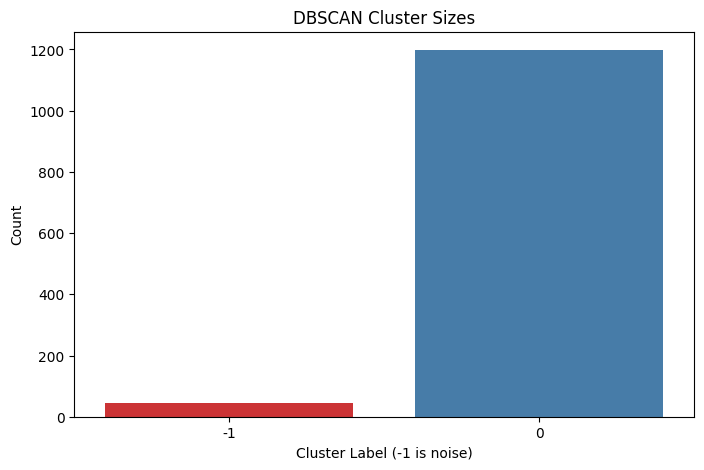

In [65]:
# write your code here

cluster_sizes = df_drop['DBSCAN_Cluster'].value_counts().sort_index()
print("Cluster sizes (including noise):")
print(cluster_sizes)

plt.figure(figsize=(8,5))
sns.countplot(x='DBSCAN_Cluster', data=df_drop, palette='Set1')

plt.title('DBSCAN Cluster Sizes')
plt.xlabel('Cluster Label (-1 is noise)')
plt.ylabel('Count')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Describe the outliers identified by the DBSCAN algorithm in the previous question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# write your code here

# Filter outliers (noise points) labeled as -1
dbscan_outliers = df_drop[df_drop['DBSCAN_Cluster'] == -1]

# Number of outliers
num_outliers = dbscan_outliers.shape[0]
print(f"Number of outliers detected by DBSCAN: {num_outliers}")

# Preview first few outliers
print(dbscan_outliers.head())

# Summary statistics of outliers
outliers_summary = dbscan_outliers.describe()
print("Summary statistics of outliers:")
print(outliers_summary)


Number of outliers detected by DBSCAN: 45
     CO2 Emissions  Energy Usage           GDP  Population Total  Cluster  \
318        5790017       1775677  2.260000e+12        1303720000        0   
319        6414463       1938944  2.710000e+12        1311020000        0   
320        6791805       2044606  3.490000e+12        1317885000        0   
321        7035444       2120814  4.520000e+12        1324655000        0   
322        7692211       2286137  4.990000e+12        1331260000        0   

     DBSCAN_Cluster  
318              -1  
319              -1  
320              -1  
321              -1  
322              -1  
Summary statistics of outliers:
       CO2 Emissions  Energy Usage           GDP  Population Total    Cluster  \
count   4.500000e+01  4.500000e+01  4.500000e+01      4.500000e+01  45.000000   
mean    3.263231e+06  1.181653e+06  4.945600e+12      6.680892e+08   0.933333   
std     2.495366e+06  8.234717e+05  4.990569e+12      5.232036e+08   0.809040   
min    